# Алгоритм LZ77

Алгоритм стиснення LZ77 - це безвтратний алгоритм стиснення даних, який замінює повторювані входження даних посиланнями на один екземпляр цих даних, що з'являється раніше у некомпресованому потоці даних. Алгоритм використовує метод зміщення вікна з двома буферами: буфером пошуку та буфером буфером входу.

- Ініціалізація: Метод __init__ ініціалізує об'єкт LZ77 з вказаним розміром буфера для буфера пошуку.

- Кодування: Метод encode стискає вхідний текст за допомогою алгоритму LZ77. Він ітерується по вхідному тексту, шукаючи співпадіння в буфері пошуку та генеруючи кортежі, що представляють зміщення, довжини та символи. Стислий текст повертається як рядок.

- Декодування: Метод decode розкодовує закодований текст за допомогою алгоритму LZ77. Він ітерується по закодованому тексту, відновлюючи оригінальний текст за допомогою зміщень та довжин. Розкодований текст повертається як рядок.

- Допоміжні методи: Клас включає допоміжні методи list_to_text та text_to_list для конвертування між списками кортежів та текстовими представленнями.

In [261]:
class LZ77:
    def __init__(self, buffer_size: int):
        self.buffer_size = buffer_size
        self.search_buffer_size = buffer_size//2

    @staticmethod
    def list_to_text(list_):
        return '¹'.join([str(el) for triplet in list_ for el in triplet])

    @staticmethod
    def text_to_list(text):
        res = []
        text = text.split('¹')
        for i in range(0, len(text), 3):
            try:
                triplet = (int(text[i]), int(text[i + 1]), text[i + 2])
            except IndexError:
                continue

            if triplet[2] == 'None':
                triplet = (triplet[0], triplet[1], None)
            res.append(triplet)
        return res


    def encode(self, text):
        encoded_text = []
        pos = 0
        lookup_buffer = text
        search_buffer = ''


        while pos < len(text):
            match_len = 0
            el = lookup_buffer[pos]

            if el not in search_buffer[-self.search_buffer_size:]:
                search_buffer += el
                encoded_text.append((0, 0, el))
                if len(search_buffer) == len(lookup_buffer):
                    return self.list_to_text(encoded_text)      
            
            else:
                while el in search_buffer[-self.search_buffer_size:]:
                    match_len += 1
                    el = lookup_buffer[pos:pos + match_len + 1]
                    if match_len > self.search_buffer_size:
                        break 
                    
                if match_len > self.search_buffer_size:
                        match_len -= self.search_buffer_size
                        break

                offset = len(search_buffer) - search_buffer.rfind(el[:-1])
                search_buffer += el
                encoded_text.append((offset, match_len, el[-1]))


            pos += len(el)

        encoded_text.append((len(search_buffer) - search_buffer.rfind(el), match_len, el if el not in search_buffer[-self.search_buffer_size:] else None))
        print(len(encoded_text)*3)
        return self.list_to_text(encoded_text)

    def decode(self, code):
        encoded_text = self.text_to_list(code)
        decoded_text = ''

        for entry in encoded_text:
            offset, length, char = entry
            if length == 0:
                decoded_text += char
            else:
                decoded_text += decoded_text[-offset:][:length]
                try:
                    decoded_text += char
                except TypeError:
                    break

        return decoded_text

123
0.0009970664978027344 0.0

--------------------------------------------------
Original text: RP4=[Pd?C0j^Yi>caH:c%2v*}6mPAPYQ?(.I;A[~:6Dx?o oF~
Decoded text: RP4=[Pd?C0j^Yi>caH:c%2v*}6mPAPYQ?(.I;A[~:6Dx?o oF~
--------------------------------------------------
252
0.000997304916381836 0.0

----------------------------------------------------------------------------------------------------
Original text: U@9`gv4#%sS"7]g2%q{.I&"uViD;n1'78tOK`nOeeZ9BPZp-mIhrrrC^,RkgZ-Oi$q"!>b(`'$|)!%&t:T`4jB""8KCa|$s2)o(B
Decoded text: U@9`gv4#%sS"7]g2%q{.I&"uViD;n1'78tOK`nOeeZ9BPZp-mIhrrrC^,RkgZ-Oi$q"!>b(`'$|)!%&t:T`4jB""8KCa|$s2)o(B
----------------------------------------------------------------------------------------------------
0.0009980201721191406 0.0009968280792236328

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

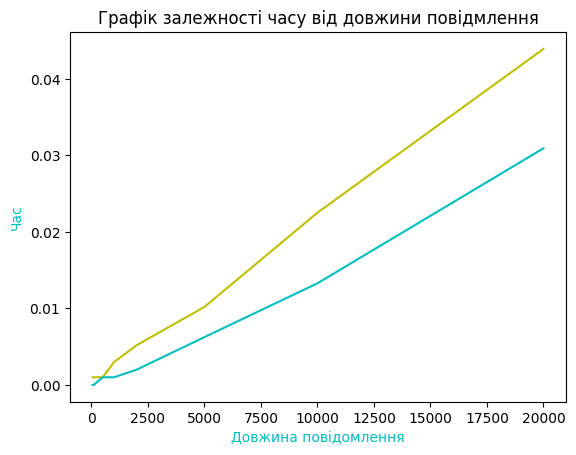

In [279]:
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import random
import string

algoritm = LZ77(50)

characters = string.ascii_letters + string.digits + string.punctuation + ' '
losses, losses2, result1, result2 = [], [], [], []
nums = [50, 100, 500, 1000, 2000, 5000, 10000, 20000]
for t in nums:
        sentence = ''.join(random.choice(characters) for _ in range(t))
        start = time.time()
        m = algoritm.encode(sentence)
        end = time.time()
        time_taken = (end - start)

        start2 = time.time()
        v = algoritm.decode(m)
        end2 = time.time()
        time_taken2 = (end2 - start2)
        
        print(time_taken, time_taken2)

        print(f'\n{"-"*len(sentence)}\nOriginal text: {sentence}\nDecoded text: {v}\n{"-"*len(sentence)}')

        losses.append(time_taken)
        losses2.append(time_taken2)

        result1.append(time_taken/len(sentence))
        result2.append(time_taken2/len(sentence))

Y = np.array([i for i in losses])
X = np.array([i for i in nums])
P = np.array([i for i in losses2])
plt.title("Графік залежності часу від довжини повідмлення")                                                                                                                                                                                        
plt.xlabel('Довжина повідомлення', c = 'c')
plt.ylabel('Час', c = 'c')
plt.plot(X, Y, c = 'y') # жовтий - encode
plt.plot(X, P, c= 'c') # синій - decode
plt.show()


273
48582


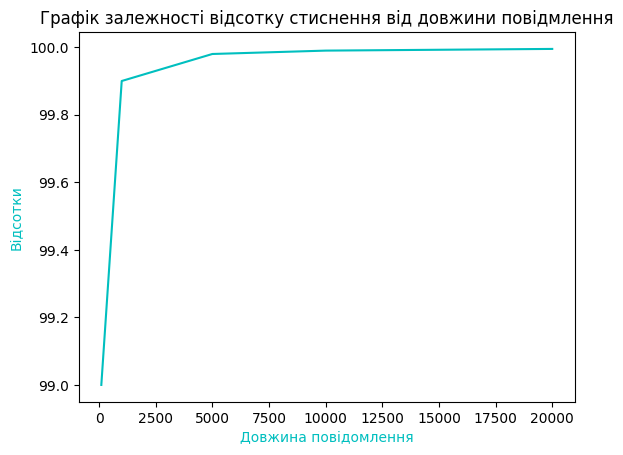

In [280]:
import matplotlib.pyplot as plt
import numpy as np

import random
import string

algoritm = LZ77(50)

characters = string.ascii_letters + string.digits + string.punctuation + ' '

nums = [100,1000, 5000, 10000, 20000]
length = []
for t in nums:
        sentence = ''.join(random.choice(characters) for _ in range(t))
        m = algoritm.encode(sentence).replace('¹', '')
        length.append(100 - (len(m[0])/len(sentence)*100))

X = np.array([i for i in nums])
P = np.array([i for i in length])
plt.title("Графік залежності відсотку стиснення від довжини повідмлення")                                                                                                                                                                                        
plt.xlabel('Довжина повідомлення', c = 'c')
plt.ylabel('Відсотки', c = 'c')
plt.plot(X, P, c= 'c')
plt.show()

#Як бачимо на графіку, чим довший текст, тим більший відсоток стиснення
# Також, алгоритм ефективніший при кодуванні книг ніж при послідовності радномних символів
# аналогічної довжини, оскільки в текстах часто повторюються слова


# Висновок:

алгоритм працює, але для його справді корисного використання має співпасти дуже багато різних факторів, таких як: розмір вікна, висока повторюваність тексту, довжина тексту. Алгоритм найкраще працює на великих об'ємах даних і з великим розміром вікна, у інших випадках, він не є надто хорошим